In [9]:
from keras import models  # Import Keras models for building neural networks.
from keras.layers import Dense, Dropout  # Import layers for defining network architecture.
from keras.utils import to_categorical  # Import utility for one-hot encoding.
from keras.datasets import mnist  # Import the MNIST dataset for training.
# from keras.utils.vis_utils import model_to_dot  # Commented out visualization import.
from IPython.display import SVG  # Import SVG display capability for Jupyter Notebook.



In [10]:
import numpy as np


# Livelossplot:

livelossplot provides a way to create live, interactive plots that update during the training of a machine learning model. These plots typically show various metrics such as loss, accuracy, and any other custom metrics you want to monitor.


In [14]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10


# Epochs Vs Batch Vs Iterations

Back propogation is a technique to reduce loss function
Neural Network uses:

Forward Propagation:

Forward propagation is the process by which input data is passed through a neural network to compute predictions or activations. It involves the following steps:

    Input Layer: The input data is fed into the neural network through the input layer. Each input feature corresponds to a neuron in the input layer.

    Hidden Layers: The data is then passed through one or more hidden layers, where linear transformations and activation functions are applied at each neuron. The output of each neuron in a layer becomes the input for the neurons in the next layer. This process continues until the data reaches the output layer.

    Output Layer: The final layer, the output layer, typically produces the network's predictions. Depending on the problem (e.g., classification, regression), the output layer may have different activation functions (e.g., softmax for classification, linear for regression).

    Loss Calculation: The output of the network is compared to the true target values, and a loss function (also known as a cost or objective function) is used to quantify the error or difference between the predictions and the ground truth.

    Propagation of Loss: The loss is then propagated backward through the network to calculate the gradients of the model's parameters with respect to the loss. This is where backward propagation comes into play.

Backward Propagation:

Backward propagation, also known as backpropagation, is the process by which gradients are calculated and updated during the training of a neural network. It involves the following steps:

    Initialization: Gradients are initialized to zero for all the model's parameters (weights and biases).

    Backward Pass: Starting from the output layer and moving backward through the hidden layers, the gradients of the loss with respect to each parameter are computed using the chain rule of calculus. This is done layer by layer.

    Gradient Descent: The computed gradients are used to update the model's parameters. This is typically done using optimization algorithms like stochastic gradient descent (SGD) or its variants (e.g., Adam, RMSprop). The parameters are updated to minimize the loss function, which improves the model's predictive performance.

    Repeat: Steps 2 and 3 are repeated for multiple iterations or epochs to iteratively improve the model's performance on the training data.

# Epochs:
    


10K images:
(In One interation) giving all dataset during training. Also use Multiple Epochs

# Batch:

16 GB
10K Images load----> 24GB
Not possible to load whole dataset.
Specify batch Size, how much images are given in one interation and further



Epoche: 1
batch_size : 10
        
epoche1---->

iteration 1  --------> (Forward)
             <-------   (backward)  loss (reduce)
    
continue: 

upto 10 iterations

if:
    
Epoche: 10
    
batch size : 128
    
Epoche1---->

iteration 1  --------> (Forward)
             <-------   (backward)  loss (reduce)
    
continue: 

upto 128 iterations

Epoche2---->

iteration 1  --------> (Forward)
             <-------   (backward)  loss (reduce)
    
continue: 

upto 128 iterations

Epoche3-->

continue 

Epoche10







In [17]:
def data_summary(X_train,y_train,X_test,y_test):
    #"Summarize current state of dataset"
    print("Train images shape:" , X_train.shape)
    print("Train labels shape:" , y_train.shape)
    print("Test images shape:" , X_test.shape)
    print("Test labels shape:" , y_test.shape) 
    print('Train labels:' , y_train)
    print('Test labels:' , y_test)
    


In [18]:
#load data

(X_train , y_train) , (X_test , y_test) = mnist.load_data()


11490434/11490434 [==============================] - 19s 2us/step


In [19]:
# Check data summary
data_summary(X_train,y_train,X_test,y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [21]:
# Reshape data converting into 1D data:

X_train = X_train.reshape((X_train.shape[0] , NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32')/255

X_test = X_test.reshape((X_test.shape[0] , NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32')/255




In [23]:
#Categorically encode labels:

#One hote encoding:

y_train = to_categorical(y_train , NUM_CLASSES)
y_test = to_categorical(y_test , NUM_CLASSES)


In [24]:
#Check state of dataset:
data_summary(X_train,y_train,X_test,y_test)


Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
#Build neural network

# Create a Sequential model, which is a linear stack of layers.
model = models.Sequential()

# Add a Dense (fully connected) layer with 512 units and ReLU activation.
# The input shape is set to (NUM_ROWS * NUM_COLS,), which is the flattened image size.
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))

# Add a Dropout layer with a dropout rate of 0.5 to prevent overfitting.
model.add(Dropout(0.5))

# Add another Dense layer with 256 units and ReLU activation.
model.add(Dense(256, activation='relu'))

# Add another Dropout layer with a dropout rate of 0.25.
model.add(Dropout(0.25))

# Add a final Dense layer with 10 units and softmax activation for classification.
model.add(Dense(10, activation='softmax'))




ReLU (Rectified Linear Activation) and Softmax are both activation functions used in neural networks, but they serve different purposes and have different characteristics:

1. **ReLU (Rectified Linear Activation):**
   - **Purpose:** ReLU is commonly used in hidden layers of neural networks to introduce non-linearity. It helps the network learn complex patterns and representations.
  

2. **Softmax:**
   - **Purpose:** Softmax is often used in the output layer of a neural network for multi-class classification problems. It converts raw scores (logits) into class probabilities.
    

In summary, ReLU is used to introduce non-linearity and learn complex features within hidden layers, while Softmax is used in the output layer to produce class probabilities for multi-class classification tasks. They serve different purposes within a neural network architecture.

In [28]:
# Compile the model with a specified optimizer, loss function, and evaluation metrics.

# Use the 'rmsprop' optimizer, which is a variant of stochastic gradient descent (SGD).
model.compile(optimizer='rmsprop',

# Specify 'categorical_crossentropy' as the loss function.
# This loss is commonly used for multi-class classification problems.
loss='categorical_crossentropy',

# Define 'accuracy' as the evaluation metric to monitor during training.
metrics=['accuracy'])



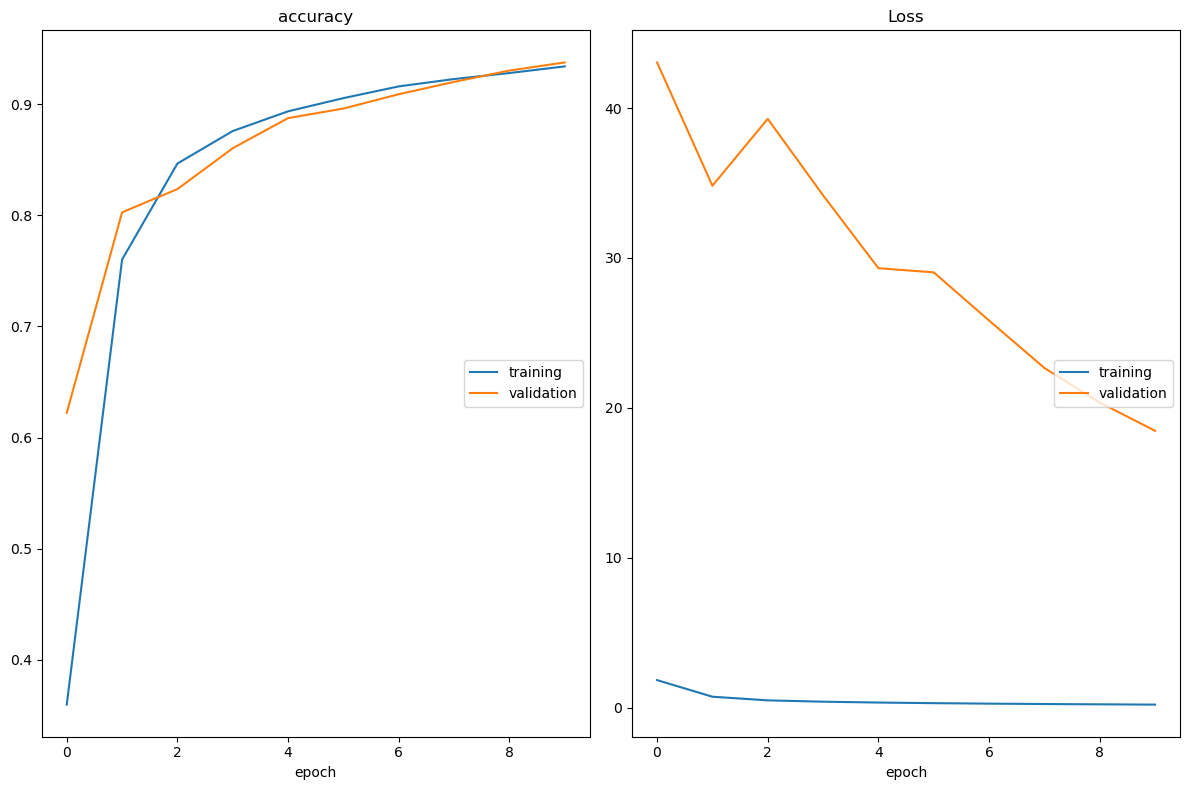

accuracy
	training         	 (min:    0.360, max:    0.934, cur:    0.934)
	validation       	 (min:    0.622, max:    0.938, cur:    0.938)
Loss
	training         	 (min:    0.220, max:    1.854, cur:    0.220)
	validation       	 (min:   18.477, max:   43.039, cur:   18.477)
469/469 [==============================] - 12s 25ms/step - loss: 0.2201 - accuracy: 0.9341 - val_loss: 18.4767 - val_accuracy: 0.9376
Test loss:  18.476667404174805
Test accuracy:  0.9376000165939331


In [29]:
# Train the model using the training data and labels.
# - X_train: Input training data
# - y_train: Corresponding training labels
# - batch_size: Number of samples per gradient update
# - epochs: Number of training epochs (iterations over the entire dataset)
# - callbacks: List of callbacks (e.g., for plotting training progress)
# - verbose: Verbosity mode (1 for progress bar, 0 for silent)
# - validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[plot_losses], verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test data to calculate the loss and accuracy.
# - X_test: Input test data
# - y_test: Corresponding test labels
# - verbose: Verbosity mode (0 for silent, no progress output)
score = model.evaluate(X_test, y_test, verbose=0)

# Print the test loss and test accuracy.
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#SVG(model_to_dot(model).create(prog = 'dot' , format = 'svg'))